# Swarm-Induced Graph

Using 'robot' positions at each timestep, compute pair-wise distances.
Robots within a threshold distance of one another can communicate.

Galen Wilkerson

(using liquidfun robotics swarm by Calum Emrie, University of Edinburgh)

In [6]:
import pandas as pd

import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

#If you want all graphs to be drawn inline, then you can set a global parameter.
#from nxpd import draw
#from nxpd import nxpdParams
#nxpdParams['show'] = 'ipynb'

from IPython import display
from ipywidgets import interact

import scipy.spatial.distance
import networkx as nx

In [2]:
# read position data from file
df = pd.read_csv('./example_freeze', sep=' ', header=None)

# last column is junk
y = df.pop(500)

In [4]:
# row = df.loc[0].values
# row = row.reshape(250,2)

#plt.scatter(row[:,0], row[:,1], marker='.');

data = df.values.reshape(102, 250,2)


def update(timestamp = widgets.IntSlider(min=0,max=len(df),step=1,value=0), 
           distance_threshold = widgets.FloatSlider(min=0.01,max=7.5,step=.01,value=1)):
    
#     row = df.loc[timestamp].values
#     row = row.reshape(250,2)

    row = data[timestamp, :, :]


    plt.figure(figsize=[10,10])
    plt.clf()

    plt.subplot(221)
    plt.scatter(row[:,0], row[:,1], marker='.');
    plt.title('positions')

    plt.subplot(222);
    
    # calculate pairwise distances


    X = row
    Y = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, 'euclidean'))
    adj = Y < distance_threshold
    
    # filter by distance threshold
    adj_mat = Y * adj.T
    
    G=nx.from_numpy_matrix(adj_mat)

    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    pos = dict(zip(range(len(row)), row))
    
    
    nx.draw(G, pos=pos, 
            node_size=3, 
            node_color = 'k',
            #edge_color='grey', 
            alpha=.5,
            edgelist=edges, 
            edge_color=1 - np.array(weights)/max(weights),
            edge_cmap=plt.cm.Blues);
    
    plt.title('connections')
    
    plt.subplot(223)
    plt.title('degree histogram')
    plt.scatter(range(len(nx.degree_histogram(G))),nx.degree_histogram(G), marker='.');
    
    plt.subplot(224)
    plt.title('distance histogram')
    plt.hist(Y.flatten(), bins = 50);
    

    if (nx.is_connected(G)):
        length = nx.average_shortest_path_length(G)
        print('average shortest path length', round(length, 3))
    
    largest_cc = max(nx.connected_components(G), key=len)
    print('largest component size', len(largest_cc))
    
interact(update);


interactive(children=(IntSlider(value=0, description='timestamp', max=102), FloatSlider(value=1.0, description…

## Evolution in time

In [91]:
distance_threshold = 1

largest_cc_sizes = []
average_shortest_path_lengths = []


data = df.values.reshape(102, 250,2)

for timestamp in range(len(df)):
    #row = df.loc[timestamp].values
    #row = row.reshape(250,2)

    row = data[timestamp, :, :]

    # calculate pairwise distances


    X = row
    Y = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, 'euclidean'))
    adj = Y < distance_threshold

    adj_mat = Y * adj.T

    G=nx.from_numpy_matrix(adj_mat)
    
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_sizes.append(len(largest_cc))
    
    if (nx.is_connected(G)):
        length = nx.average_shortest_path_length(G)
        #print('average shortest path length', round(length, 3))
        average_shortest_path_lengths.append(length)
    else:
        average_shortest_path_lengths.append(-1)
    
    if (timestamp % 10 == 0):
        print('done: ', round(timestamp / len(df), 3) * 100, '%')

done:  0.0 %
done:  9.8 %
done:  19.6 %
done:  29.4 %
done:  39.2 %
done:  49.0 %
done:  58.8 %
done:  68.60000000000001 %
done:  78.4 %
done:  88.2 %
done:  98.0 %


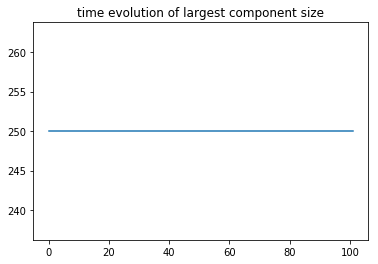

In [94]:
plt.plot(largest_cc_sizes);
plt.title('time evolution of largest component size');

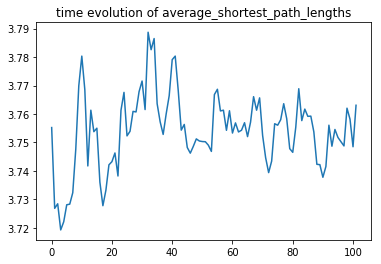

In [93]:
plt.plot(average_shortest_path_lengths);
plt.title('time evolution of average_shortest_path_lengths');

## Distance threshold effect on graph

In [102]:
distance_thresholds =  np.arange(.1,4,.2)

# random timestamp
timestamp = np.random.choice(len(df))
print('timestamp', timestamp)

largest_cc_sizes = []
average_shortest_path_lengths = []

data = df.values.reshape(102, 250,2)

for distance_threshold in distance_thresholds:
    #row = df.loc[timestamp].values
    #row = row.reshape(250,2)

    row = data[timestamp, :, :]
    # calculate pairwise distances


    X = row
    Y = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, 'euclidean'))
    adj = Y < distance_threshold

    adj_mat = Y * adj.T

    G=nx.from_numpy_matrix(adj_mat)
    
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_sizes.append(len(largest_cc))
    
    if (nx.is_connected(G)):
        length = nx.average_shortest_path_length(G)
        #print('average shortest path length', round(length, 3))
        average_shortest_path_lengths.append(length)
    else:
        average_shortest_path_lengths.append(None)
    
    print(distance_threshold)

timestamp 95
0.1
0.30000000000000004
0.5000000000000001
0.7000000000000001
0.9000000000000001
1.1000000000000003
1.3000000000000003
1.5000000000000004
1.7000000000000004
1.9000000000000004
2.1000000000000005
2.3000000000000007
2.5000000000000004
2.7000000000000006
2.900000000000001
3.1000000000000005
3.3000000000000007
3.500000000000001
3.7000000000000006
3.900000000000001


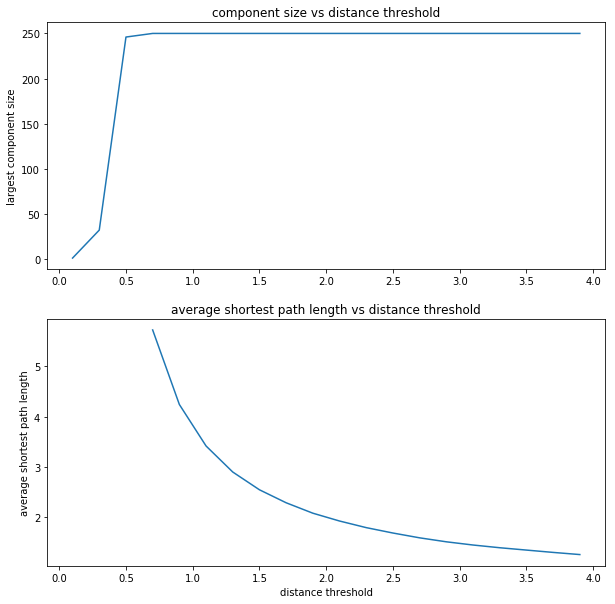

In [88]:
plt.figure(figsize=[10,10])
ax1 = plt.subplot(211)
plt.plot(distance_thresholds, largest_cc_sizes);
plt.ylabel('largest component size');
plt.title('component size vs distance threshold');
plt.setp(ax1.get_xticklabels(), fontsize=10);

# share x only
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(distance_thresholds, average_shortest_path_lengths);
plt.xlabel('distance threshold')
plt.ylabel('average shortest path length');
plt.title('average shortest path length vs distance threshold');
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=True);

## Swarm of robots

In [7]:
def wrap(a):
    '''
    return a number between 0 and 2 pi
    '''
    
    a_wrapped = a % (2 * np.pi)

    return(a_wrapped)


def boundary_check_add(a, b, maxval, minval = 0):
    '''
    Return maxval if a + b > maxval, 0 if a + b < minval, otherwise return a + b
    '''

    if a + b > maxval:
        return float(maxval)
    elif a + b < minval:
        return float(minval)
    else:
        return a + b
    
    
def flip_theta_at_bounds(theta, newx, newy, max_x, max_y, min_x = 0, min_y = 0):
    '''
    if at bounds, flip theta by pi
    '''

    if newx == max_x or newy == max_y or newx == min_x or newy == min_y:      
        theta = float(wrap(theta + np.pi))

    return(theta)
    

In [8]:
class robot_swarm():

    def __init__(self, 
                 num_robots = 100,
                 world_max_x = 5, 
                 world_max_y = 5,
                 velocity = .1):
        '''
        each robot has position, direction, constant velocity
        '''

        self.num_robots = num_robots
        self.world_max_x = world_max_x
        self.world_max_y = world_max_y
        self.velocity = velocity
        
        # position, direction (in radians) of each robot
        #robot_states = np.array([num_robots, 3])

        robot_states = np.random.random([num_robots, 3])
        robot_states[:, 0] *= world_max_y
        robot_states[:, 1] *= world_max_x
        robot_states[:, 2] *= 2 * np.pi
        
        self.robot_states = robot_states
        
        
    def step(self):
        '''
        for each robot:
            move one step forward
            
            if beyond boundary, 
              turn around and set at boundary
            else
              turn robot slightly left or right (pi/8), or stay straight

            if near oil (within .1 distance), send "ping"
        '''
        
        
        
        # the change in location
        angle = self.robot_states[:,2]
        
        xdiff = np.cos(angle) * self.velocity
        ydiff = np.sin(angle) * self.velocity
        
        # move forward 
        # if beyond boundary, 
        #    turn around and set at boundary
        x = self.robot_states[:,0]
        y = self.robot_states[:,1]
        

        boundary_check_add_vectorized = np.vectorize(boundary_check_add)
        newx = boundary_check_add_vectorized(x, xdiff, maxval= self.world_max_x, minval = 0)
        newy = boundary_check_add_vectorized(y, ydiff, maxval= self.world_max_y, minval = 0)

        flip_theta_vectd = np.vectorize(flip_theta_at_bounds)
        new_angle = flip_theta_vectd(angle, newx, newy, self.world_max_x, self.world_max_y)

        angle_change = np.random.choice([np.pi/8, -np.pi/8, 0], size=[self.num_robots])

        new_angle = wrap(new_angle + angle_change)
        
        self.robot_states[:,0] = newx
        self.robot_states[:,1] = newy
        self.robot_states[:,2] = new_angle


In [9]:
class oil_spill():
    
    def __init__(self, 
                 num_oil_globules = 30,
                 world_max_x = 5, 
                 world_max_y = 5,
                 velocity = .01):
        '''
        each oil globule has position, direction, constant velocity (much slower than oil_globules)
        '''

        self.num_oil_globules = num_oil_globules
        self.world_max_x = world_max_x
        self.world_max_y = world_max_y
        self.velocity = velocity
        
        # position, direction (in radians) of each oil_globule
        # oil_globule_states = np.array([num_oil_globules, 3])

        oil_globule_states = np.random.random([num_oil_globules, 3])
        oil_globule_states[:,0] *= world_max_y
        oil_globule_states[:,1] *= world_max_x
        oil_globule_states[:,2] *= 2 * np.pi
        
        self.oil_globule_states = oil_globule_states
    
    def step(self):
        
        # the change in location
        angle = self.oil_globule_states[:,2]
        
        xdiff = np.cos(angle) * self.velocity
        ydiff = np.sin(angle) * self.velocity
        
        # move forward 
        # if beyond boundary, 
        #    turn around and set at boundary
        x = self.oil_globule_states[:,0]
        y = self.oil_globule_states[:,1]
        

        boundary_check_add_vectorized = np.vectorize(boundary_check_add)
        
        newx = boundary_check_add_vectorized(x, xdiff, maxval= self.world_max_x, minval = 0)
        newy = boundary_check_add_vectorized(y, ydiff, maxval= self.world_max_y, minval = 0)

        flip_theta_vectd = np.vectorize(flip_theta_at_bounds)
        new_angle = flip_theta_vectd(angle, newx, newy, self.world_max_x, self.world_max_y)
        
        self.oil_globule_states[:,0] = newx
        self.oil_globule_states[:,1] = newy
        self.oil_globule_states[:,2] = new_angle

In [54]:
class world():
    
    def __init__(self):
        
        self.swarm = robot_swarm()
        self.spill = oil_spill()
        
        self.robot_history = []
        self.spill_history = []
        
    def draw(self):
        
        x= self.swarm.robot_states[:,0]
        y= self.swarm.robot_states[:,1]
        
        plt.scatter(x, y, marker='.', color = 'red');
        plt.title('positions')
        
        x= self.spill.oil_globule_states[:,0]
        y= self.spill.oil_globule_states[:,1]
        plt.scatter(x,y, marker= 'o', color = 'grey')
        

    def eat(self, eat_distance = .1):
        '''
        each robot eats oil if within eat_distance
        '''
        
        robot_positions = self.swarm.robot_states[:,:2]
        oil_globule_positions = self.spill.oil_globule_states[:, :2]
        dists = scipy.spatial.distance.cdist(robot_positions, oil_globule_positions)
        
        eat = (dists < eat_distance)
        eat_matches = np.argwhere(eat)  # each row is robot_id, oil_id
        
        
        
    def step(self):
        '''
        '''
        self.robot_history.append(self.swarm.robot_states)
        self.spill_history.append(self.spill.oil_globule_states)
        
        self.swarm.step()
        self.spill.step()
        
    def save(self, filename):
        '''
        '''
        pd.to_pickle(self.robot_history, filename + 'swarm.pkl')
        pd.to_pickle(self.spill_history, filename + 'spill.pkl')

In [11]:
myworld = world()



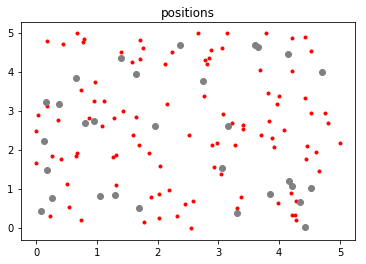

In [12]:
for i in range(50):

    myworld.step()

myworld.draw()

In [13]:
X = myworld.swarm.robot_states[:, :2]

## Draw the induced graph, robot locations, and oil spill locations

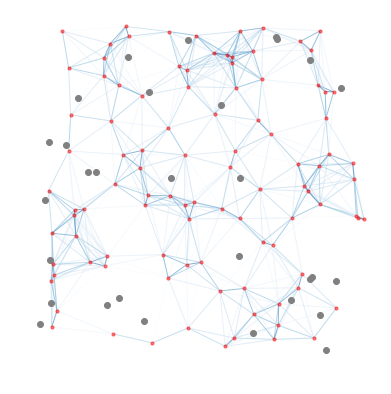

In [32]:
myworld.step()

distance_threshold = 1

Y = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, 'euclidean'))
adj = Y < distance_threshold

# filter by distance threshold
adj_mat = Y * adj.T

G=nx.from_numpy_matrix(adj_mat)

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = dict(zip(range(len(X)), X))

plt.figure(figsize=[5,5])
nx.draw(G, pos=pos, 
        node_size=10, 
        node_color = 'r',
        #edge_color='grey', 
        alpha=.5,
        edgelist=edges, 
        edge_color=1 - np.array(weights)/max(weights),
        edge_cmap=plt.cm.Blues);

x= myworld.spill.oil_globule_states[:,0]
y= myworld.spill.oil_globule_states[:,1]
plt.scatter(x,y, marker= 'o', color = 'grey');

In [39]:
robot_positions = myworld.swarm.robot_states[:,:2] 
oil_globule_positions = myworld.spill.oil_globule_states[:, :2]

In [41]:
dists = scipy.spatial.distance.cdist(robot_positions, oil_globule_positions)

In [42]:
dists.shape

(100, 30)

In [53]:
eat = (dists < .1)

np.argwhere(eat) # each row is robot_id, oil_id

array([[12, 13],
       [18,  4]])